In [1]:
import numpy as np, os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import seaborn as sn

In [2]:
dataset_path = '/home/ikansizo/Core/Vision_Fall_Detection/core/dataset/'
train_path = dataset_path + 'train/'
test_path = dataset_path + 'test/'
num_classes = 5

In [3]:
def dataloader(path):
    
    actions = os.listdir(path)
    data = []
    labels = []
    for i, act in enumerate(actions):
        data.extend([np.load(path +act+ '/'+f).reshape((-1)) for f in os.listdir(path+act)])
        labels.extend(i*np.ones(len(os.listdir(path+act))))

    return np.array(data), np.array(labels)

def pipeline(train_path, test_path):
    
    # Load data
    train_data, train_labels = dataloader(train_path)
    test_data, test_labels = dataloader(test_path)
    # Fit data
    clf = svm.SVC()
    clf.fit(train_data, train_labels)
    # Predict
    predictions = clf.predict(test_data)
    print(100*np.sum(np.equal(test_labels,predictions).astype(int))/len(test_labels))
    print()
    return predictions, test_labels

In [4]:
predictions, labels = pipeline(train_path, test_path)

96.22641509433963



In [5]:
### Confusion Matrix ###
conf_matrix = np.zeros((num_classes,num_classes))
for i in range(len(predictions)):
    conf_matrix[int(labels[i]),int(predictions[i])] += 1

for i in range(len(conf_matrix)):
    conf_matrix[i] = conf_matrix[i]/sum(conf_matrix[i])

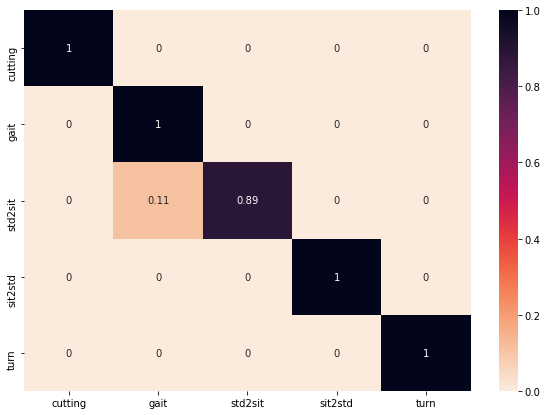

In [6]:
### Some plotting
df_cm = pd.DataFrame(conf_matrix, index = [i for i in ['cutting','gait','std2sit','sit2std','turn']],
                  columns = [i for i in ['cutting','gait','std2sit','sit2std','turn']])
fig = plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=sn.cm.rocket_r)
plt.show()

In [7]:
# Save figure
# fig.savefig('/home/ikansizo/Core/Vision_Fall_Detection/core/svm/gr1.pdf')